In [13]:
from keras.layers import Input, Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from keras.models import Model

In [15]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#encoded = Dense(128, activation='relu')(input_img)
#encoded = Dense(64, activation='relu')(encoded)
#encoded = Dense(32, activation='relu')(encoded)

#decoded = Dense(64, activation='relu')(encoded)
#decoded = Dense(128, activation='relu')(decoded)
#decoded = Dense(784, activation='sigmoid')(decoded)

In [16]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [17]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [18]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [19]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [20]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [21]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.3625 - val_loss: 0.2731
Epoch 2/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.2678 - val_loss: 0.2595
Epoch 3/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.2497 - val_loss: 0.2372
Epoch 4/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2280 - val_loss: 0.2173
Epoch 5/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2118 - val_loss: 0.2041
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2009 - val_loss: 0.1949
Epoch 7/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1925 - val_loss: 0.1875
Epoch 8/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1854 - val_loss: 0.1806
Epoch 9/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1790 - val_loss: 0.1744
Epoch

In [22]:
encoded_imgs = encoder.predict(x_test)

In [23]:
decoded_imgs = decoder.predict(encoded_imgs)

In [24]:
import matplotlib.pyplot as plt

n = 20  # how many digits we will display

plt.figure(figsize=(20, 4))


<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

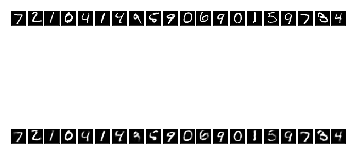

In [25]:
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
## Data preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
md_1 = pd.read_csv('/Users/tahiyachowdhury/Desktop/practicepython/Datasets/Elevator-Escalator/csv-segments/Interval Labels/0_IntervalLabel-352622063881655_1463620885782.csv', usecols = ['start', 'end', 'label'])

In [28]:
md_1 = pd.DataFrame(md_1)

In [29]:
md_1.head()

,start,end,label
0,1463620829317000000,1463620884043000000,Standing
1,1463620762596000000,1463620826401000000,Walking
2,1463620891851000000,1463620917543000000,Walking
3,1463620924518000000,1463620972530000000,Escalator
4,1463620976355000000,1463620987050000000,Walking


In [30]:
md_2= pd.read_csv('/Users/tahiyachowdhury/Desktop/practicepython/Datasets/Elevator-Escalator/csv-segments/Interval Labels/0_IntervalLabel-352622063881655_1463621042748.csv', usecols = ['start', 'end', 'label'])
md_2 = pd.DataFrame(md_2)

In [31]:
md_3 = pd.read_csv('/Users/tahiyachowdhury/Desktop/practicepython/Datasets/Elevator-Escalator/csv-segments/Interval Labels/0_IntervalLabel-352622063881655_1463621169311.csv', usecols = ['start', 'end', 'label'])
md_3 = pd.DataFrame(md_3)
md_3.head()

,start,end,label
0,1463621119494000000,1463621167984000000,Escalator
1,1463621171675000000,1463621188372000000,Walking
2,1463621191659000000,1463621239025000000,Escalator
3,1463621243056000000,1463621255284000000,Walking


In [32]:
md_4 = pd.read_csv('/Users/tahiyachowdhury/Desktop/practicepython/Datasets/Elevator-Escalator/csv-segments/Interval Labels/0_IntervalLabel-352622063881655_1463621309816.csv', usecols = ['start', 'end', 'label'])
md_4.head()

,start,end,label
0,1463621258957000000,1463621308597000000,Escalator
1,1463621312702000000,1463621348001000000,Walking
2,1463621364015000000,1463621389006000000,Elevator
3,1463621400105000000,1463621423333000000,Walking


In [38]:
md_5 = pd.read_csv('/Users/tahiyachowdhury/Desktop/practicepython/Datasets/Elevator-Escalator/csv-segments/Interval Labels/0_IntervalLabel-352622063881655_1463621449792.csv', usecols = ['start', 'end', 'label'])
md_5.head()

,start,end,label
0,1463621432397000000,1463621446497000000,Elevator
1,1463621455568000000,1463621488346000000,Walking
2,1463621503513000000,1463621549968000000,Escalator


In [33]:
md_6 = pd.read_csv('/Users/tahiyachowdhury/Desktop/practicepython/Datasets/Elevator-Escalator/csv-segments/Interval Labels/0_IntervalLabel-352622063881655_1463621615615.csv', usecols = ['start', 'end', 'label'])
md_6.head()

,start,end,label
0,1463621553785000000,1463621563833000000,Walking
1,1463621566726000000,1463621614141000000,Escalator
2,1463621618769000000,1463621670804000000,Walking
3,1463621688928000000,1463621722754000000,Elevator


In [34]:
md_7 = pd.read_csv('/Users/tahiyachowdhury/Desktop/practicepython/Datasets/Elevator-Escalator/csv-segments/Interval Labels/0_IntervalLabel-352622063881655_1463621886880.csv', usecols = ['start', 'end', 'label'])
md_7.head()

,start,end,label
0,1463621732987000000,1463621884961000000,Walking
1,1463621913294000000,1463621930105000000,Elevator
2,1463621933734000000,1463621957929000000,Walking
3,1463621967870000000,1463621988929000000,Elevator


In [35]:
md_8 = pd.read_csv('/Users/tahiyachowdhury/Desktop/practicepython/Datasets/Elevator-Escalator/csv-segments/Interval Labels/0_IntervalLabel-352622063881655_1463622057542.csv', usecols = ['start', 'end', 'label'])
md_8.head()

,start,end,label
0,1463621992025000000,1463622056529000000,Walking


In [36]:
md_9 = pd.read_csv('/Users/tahiyachowdhury/Desktop/practicepython/Datasets/Elevator-Escalator/csv-segments/Interval Labels/0_IntervalLabel-352622063881655_1463622291046.csv', usecols = ['start', 'end', 'label'])
md_9.head()

,start,end,label
0,1463622061129000000,1463622289900000000,Standing


In [39]:
frames = [md_1, md_2, md_3, md_4, md_5, md_6, md_7, md_8, md_9]
labels = pd.concat(frames, axis = 0, ignore_index='False')

In [40]:
labels.values

array([[1463620829317000000, 1463620884043000000, 'Standing'],
       [1463620762596000000, 1463620826401000000, 'Walking'],
       [1463620891851000000, 1463620917543000000, 'Walking'],
       [1463620924518000000, 1463620972530000000, 'Escalator'],
       [1463620976355000000, 1463620987050000000, 'Walking'],
       [1463620990714000000, 1463621041241000000, 'Escalator'],
       [1463621049526000000, 1463621098256000000, 'Escalator'],
       [1463621102441000000, 1463621116493000000, 'Walking'],
       [1463621119494000000, 1463621167984000000, 'Escalator'],
       [1463621171675000000, 1463621188372000000, 'Walking'],
       [1463621191659000000, 1463621239025000000, 'Escalator'],
       [1463621243056000000, 1463621255284000000, 'Walking'],
       [1463621258957000000, 1463621308597000000, 'Escalator'],
       [1463621312702000000, 1463621348001000000, 'Walking'],
       [1463621364015000000, 1463621389006000000, 'Elevator'],
       [1463621400105000000, 1463621423333000000, 'Walki